## Euler Method

### Ex1: Radioactive Decay

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
nmax = 20  # number of iterations
y = 1  # Starting Value
h = 0.1 # Stepsize
t_values = [0]
y_values = [y]

In [3]:
for i in range(1, nmax+1):
    f = -y
    y = y + f*h
    t_values.append(i*h)
    y_values.append(y)

In [4]:
y

0.12157665459056928

In [5]:
np.exp(-nmax*h)

0.1353352832366127

In [6]:
y_values

[1,
 0.9,
 0.81,
 0.7290000000000001,
 0.6561000000000001,
 0.5904900000000001,
 0.531441,
 0.4782969,
 0.43046721,
 0.387420489,
 0.3486784401,
 0.31381059609,
 0.282429536481,
 0.2541865828329,
 0.22876792454961,
 0.20589113209464902,
 0.1853020188851841,
 0.16677181699666568,
 0.15009463529699912,
 0.1350851717672992,
 0.12157665459056928]

In [7]:
t_values

[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3,
 1.4000000000000001,
 1.5,
 1.6,
 1.7000000000000002,
 1.8,
 1.9000000000000001,
 2.0]

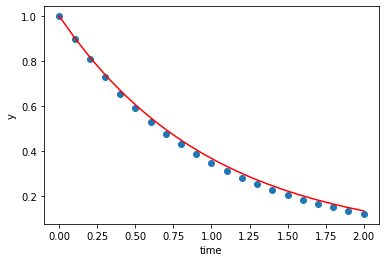

In [9]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = np.exp(-test_t)

plt.xlabel('time')
plt.ylabel('y')
plt.plot(test_t, test_y, c='red')
plt.scatter(t_values,y_values)

## Define a function: "Euler ODE"

In [10]:
def eulerODE(f,t0,y0,nmax,h):
    """
    f: Function
    t0: Starting Time
    y0: Starting Value
    nmax: Maximum number of iterations
    h: Stepsize
    """
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        y = y + f(t,y)*h
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

In [11]:
def f_ODE(t,y):
    return -y

t0 = 0
nmax = 200
h = 0.01
y0 = 1
solution = eulerODE(f_ODE,t0,y0,nmax,h)

In [12]:
solution

array([[0.        , 0.01      , 0.02      , 0.03      , 0.04      ,
        0.05      , 0.06      , 0.07      , 0.08      , 0.09      ,
        0.1       , 0.11      , 0.12      , 0.13      , 0.14      ,
        0.15      , 0.16      , 0.17      , 0.18      , 0.19      ,
        0.2       , 0.21      , 0.22      , 0.23      , 0.24      ,
        0.25      , 0.26      , 0.27      , 0.28      , 0.29      ,
        0.3       , 0.31      , 0.32      , 0.33      , 0.34      ,
        0.35      , 0.36      , 0.37      , 0.38      , 0.39      ,
        0.4       , 0.41      , 0.42      , 0.43      , 0.44      ,
        0.45      , 0.46      , 0.47      , 0.48      , 0.49      ,
        0.5       , 0.51      , 0.52      , 0.53      , 0.54      ,
        0.55      , 0.56      , 0.57      , 0.58      , 0.59      ,
        0.6       , 0.61      , 0.62      , 0.63      , 0.64      ,
        0.65      , 0.66      , 0.67      , 0.68      , 0.69      ,
        0.7       , 0.71      , 0.72      , 0.73

## Ex2: Time amplified Radioactive Decay

In [20]:
a = 0.01
def f_ODE(t,y):
    return -a*y*t

t0 = 0
nmax = 300
h = 0.1
y0 = 1
solution = eulerODE(f_ODE,t0,y0,nmax,h)

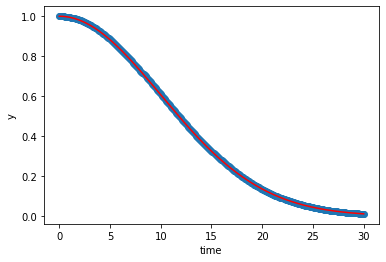

In [21]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)

plt.xlabel('time')
plt.ylabel('y')
plt.plot(test_t, test_y, c='red')
plt.scatter(solution[0],solution[1])

## Higher Order Differential Equations

In [22]:
def eulerODE2(f,t0,y00,y10,nmax,h):
    """
    f: Function
    t0: Starting Time
    y00: Starting Value of y(t)
    y10: Starting Value of y'(t)
    nmax: Maximum number of iterations
    h: Stepsize
    """
    y0 = y00
    y1 = y10
    t = t0
    t_values = [t]
    y0_values = [y0]
    y1_values = [y1]
    for i in range(1, nmax+1):
        y0 = y0 + y1*h
        y1 = y1 + f(t,y0,y1)*h
        t = t + h
        t_values.append(t)
        y0_values.append(y0)
        y1_values.append(y1)
    return np.array([t_values, y0_values, y1_values])

## Ex3: Free Fall

In [24]:
g = 9.81

def f_ODE(t,y0,y1):
    return -g

t0 = 0
y00 = 10
y10 = 50
nmax = 100
h = 0.1

solution = eulerODE2(f_ODE,t0,y00,y10,nmax,h)

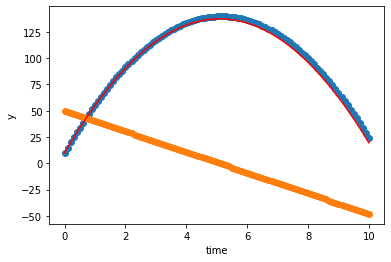

In [26]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = -g/2 * test_t**2 + y10*test_t + y00

plt.xlabel('time')
plt.ylabel('y')
plt.plot(test_t, test_y, c='red')
plt.scatter(solution[0],solution[1])
plt.scatter(solution[0],solution[2])

## Ex4: Pendulum

In [32]:
length = 2
c = 9.81/ length
b = 0

def f_ODE(t,theta0,theta1):
    return - b*theta1 - c*theta0

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 200
h = 0.1

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

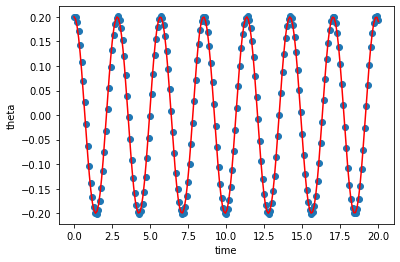

In [33]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(c)*test_t)

plt.xlabel('time')
plt.ylabel('theta')
plt.plot(test_t, test_theta, c='red')
plt.scatter(solution[0],solution[1])
#plt.scatter(solution[0],solution[2])

## Accurate solution of the Pendulum

In [34]:
length = 2
c = 9.81/ length
b = 0

def f_ODE(t,theta0,theta1):
    return - b*theta1 - c*np.sin(theta0)

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 200
h = 0.1

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

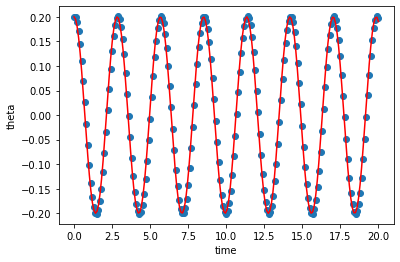

In [35]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(c)*test_t)

plt.xlabel('time')
plt.ylabel('theta')
plt.plot(test_t, test_theta, c='red')
plt.scatter(solution[0],solution[1])
#plt.scatter(solution[0],solution[2])

In [36]:
theta00 = 2

In [37]:
180/np.pi * 2

114.59155902616465

In [38]:
solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

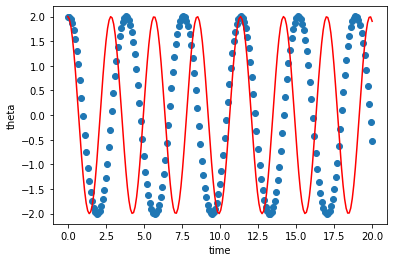

In [39]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(c)*test_t)

plt.xlabel('time')
plt.ylabel('theta')
plt.plot(test_t, test_theta, c='red')
plt.scatter(solution[0],solution[1])

This shows that the analytical solution as indicated by orange color is not correct since that analytical solution was only true for small angles.

## Adding damping and driving forces

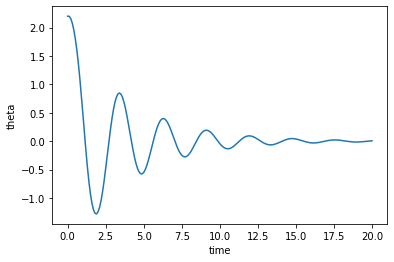

In [41]:
length = 2
c = 9.81/ length
b = 0.5

def f_ODE(t,theta0,theta1):
    return - b*theta1 - c*np.sin(theta0)

t0 = 0
theta00 = 2.2
theta10 = 0
nmax = 200
h = 0.1

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('time')
plt.ylabel('theta')
plt.plot(solution[0],solution[1])

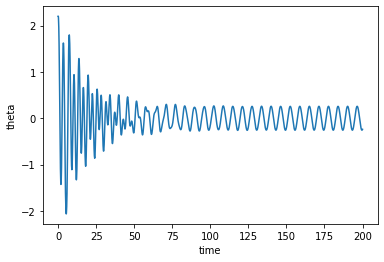

In [47]:
length = 2
c = 9.81/ length
b = 0.1
d = -1
omega = 1

def f_ODE(t,theta0,theta1):
    return - b*theta1 - c*np.sin(theta0) - d*np.sin(omega*t)

t0 = 0
theta00 = 2.2
theta10 = 0
nmax = 2000
h = 0.1

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('time')
plt.ylabel('theta')
plt.plot(solution[0],solution[1])

## Using Scipy Function: solve_ivp

In [48]:
a = 0.01
def f_ODE(t,y):
    return -a*y*t

t0 = 0
nmax = 300
h = 0.1
y0 = 1
solution = eulerODE(f_ODE,t0,y0,nmax,h)

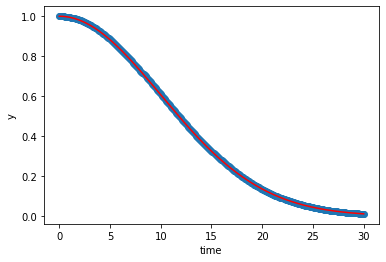

In [49]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)

plt.xlabel('time')
plt.ylabel('y')
plt.plot(test_t, test_y, c='red')
plt.scatter(solution[0],solution[1])

Using solve_ivp method:

In [50]:
solution_RK45 = integrate.solve_ivp(f_ODE, [0,30], [1], method = 'RK45')

In [51]:
solution_RK45.t

array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 1.11111000e+01, 1.92727200e+01,
       2.30667766e+01, 2.68608331e+01, 3.00000000e+01])

In [52]:
solution_RK45.y

array([[1.        , 1.        , 0.99999999, 0.99999938, 0.99993829,
        0.9938463 , 0.53921663, 0.15615019, 0.06995529, 0.02715399,
        0.01112937]])

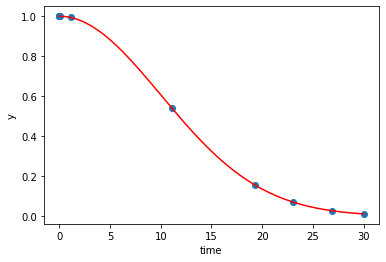

In [54]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)

plt.xlabel('time')
plt.ylabel('y')
plt.plot(test_t, test_y, c='red')
plt.scatter(solution_RK45.t,solution_RK45.y)

## Higher Order differential equation with solve_ivp

In [55]:
g = 9.81

def f_ODE(t,y):
    return y[1], -g

y0 = 10
v0 = 50

solution_RK45 = integrate.solve_ivp(f_ODE, [0,10], [y0,v0], method = 'RK45')

In [63]:
solution_RK45.y[1]

array([ 50.        ,  49.2380616 ,  41.61867762, -34.5751622 ,
       -48.1       ])

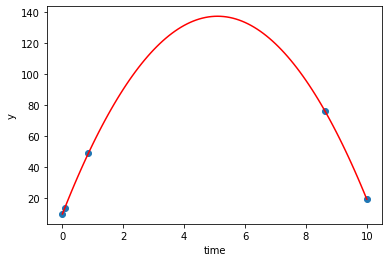

In [67]:
plt.xlabel('time')
plt.ylabel('y')
plt.scatter(solution_RK45.t,solution_RK45.y[0])

test_t = np.linspace(0, 10, 101)
test_y = -g/2 * test_t**2 + y10*test_t + y00
plt.plot(test_t, test_y, c='red')

## Compare different methods for solving differential equations

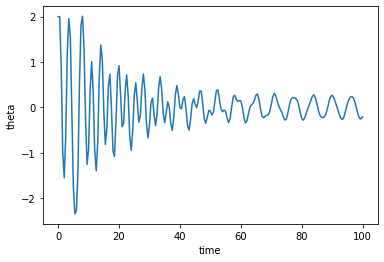

In [68]:
length = 2
c = 9.81/ length
b = 0.1
d = -1
omega = 1

def f_ODE(t,theta0,theta1):
    return - b*theta1 - c*np.sin(theta0) - d*np.sin(omega*t)

t0 = 0
theta00 = 2.0
theta10 = 0
nmax = 200
h = 0.5

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('time')
plt.ylabel('theta')
plt.plot(solution[0],solution[1])

In [70]:
def f_ODE(t,theta):
    return theta[1], - b*theta[1] - c*np.sin(theta[0]) - d*np.sin(omega*t)

theta00 = 2
theta10 = 0

solution_RK45 = integrate.solve_ivp(f_ODE, [0,100], [theta00,theta10], method = 'RK45', t_eval = np.linspace(0,100,201))

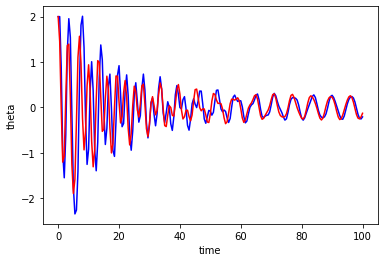

In [71]:
plt.xlabel('time')
plt.ylabel('theta')
plt.plot(solution[0],solution[1], c='blue')
plt.plot(solution_RK45.t,solution_RK45.y[0], c='red')

In [72]:
solution_RK23 = integrate.solve_ivp(f_ODE, [0,100], [theta00,theta10], method = 'RK23', t_eval = np.linspace(0,100,201))
solution_DOP853 = integrate.solve_ivp(f_ODE, [0,100], [theta00,theta10], method = 'DOP853', t_eval = np.linspace(0,100,201))
solution_Radau = integrate.solve_ivp(f_ODE, [0,100], [theta00,theta10], method = 'Radau', t_eval = np.linspace(0,100,201))
solution_BDF = integrate.solve_ivp(f_ODE, [0,100], [theta00,theta10], method = 'BDF', t_eval = np.linspace(0,100,201))
solution_LSODA = integrate.solve_ivp(f_ODE, [0,100], [theta00,theta10], method = 'LSODA', t_eval = np.linspace(0,100,201))
solution_RK45 = integrate.solve_ivp(f_ODE, [0,100], [theta00,theta10], method = 'RK45', t_eval = np.linspace(0,100,201))

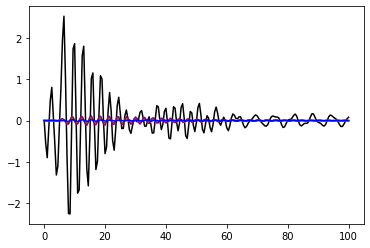

In [74]:
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution[1], c='k')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_DOP853.y[0], c='red')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_Radau.y[0], c='green')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_BDF.y[0], c='orange')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_LSODA.y[0], c='purple')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_RK23.y[0], c='blue')

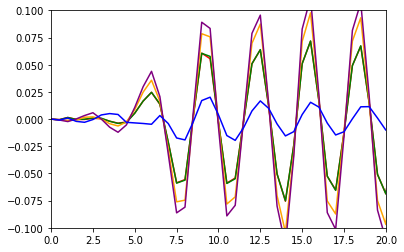

In [76]:
plt.xlim([0,20])
plt.ylim([-0.1,0.1])

#plt.plot(solution_RK45.t,solution_RK45.y[0] - solution[1], c='k')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_DOP853.y[0], c='red')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_Radau.y[0], c='green')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_BDF.y[0], c='orange')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_LSODA.y[0], c='purple')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_RK23.y[0], c='blue')

## Implementation of RK 4th order method

In [77]:
def rk4(f,t0,y0,nmax,h):
    """
    f: Function
    t0: Starting Time
    y0: Starting Value
    nmax: Maximum number of iterations
    h: Stepsize
    """
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        k1 = h * f(t,y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        k = 1/6*k1 + 1/3*k2 + 1/3*k3 + 1/6*k4
        
        y = y + k
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

## Implementation of RK45 method

In [78]:
def rk45(f,t0,y0,nmax,h):  
    """
    f: Function
    t0: Starting Time
    y0: Starting Value
    nmax: Maximum number of iterations
    h: Stepsize
    """
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        k1 = h * f(t,y)
        k2 = h * f(t + h/4, y + k1/4)
        k3 = h * f(t + h*3/8, y + k1*3/32 + k2*9/32)
        k4 = h * f(t + h*12/13, y + k1*1932/2197 - k2*7200/2197 + k3*7296/2197)
        k5 = h * f(t + h*1, y + k1*439/216 - k2*8 + k3*3680/513 - k4*845/4104 )
        k6 = h * f(t + h*1/2, y - k1*8/27 + k2*2 - k3*3544/2565 + k4*1859/4104 - k5*11/40 )
        k = 16/135*k1 + 0*k2 + 6656/12825*k3 + 28561/56430*k4 - 9/50*k5 + 2/55*k6
        
        y = y + k
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

## Comparision of RK4, RK45 and Euler Method

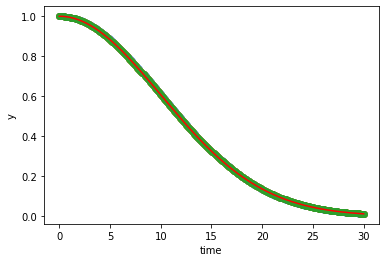

In [88]:
a = 0.01
def f_ODE(t,y):
    return -a*y*t

t0 = 0
nmax = 300
h = 0.1
y0 = 1
solution_euler = eulerODE(f_ODE,t0,y0,nmax,h)
solution_rk4 = rk4(f_ODE,t0,y0,nmax,h)
solution_rk45 = rk45(f_ODE,t0,y0,nmax,h)

test_t = np.linspace(0, nmax*h, nmax + 1)
test_y = y0*np.exp(-test_t**2 * a/2)

plt.xlabel('time')
plt.ylabel('y')
plt.plot(test_t, test_y, c='red')
plt.scatter(solution_euler[0],solution_euler[1])
plt.scatter(solution_rk4[0],solution_rk4[1])
plt.scatter(solution_rk45[0],solution_rk45[1])

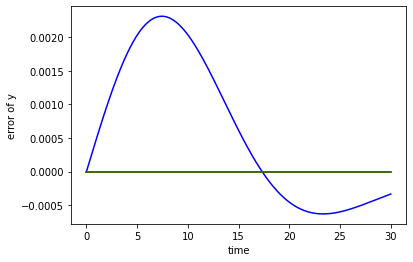

In [92]:
plt.xlabel('time')
plt.ylabel('error of y')
# plt.plot(test_t, test_y, c='red')
plt.plot(solution_euler[0],solution_euler[1] - test_y, 'blue')
plt.plot(solution_rk4[0],solution_rk4[1] - test_y, 'red')
plt.plot(solution_rk45[0],solution_rk45[1] - test_y, 'green')

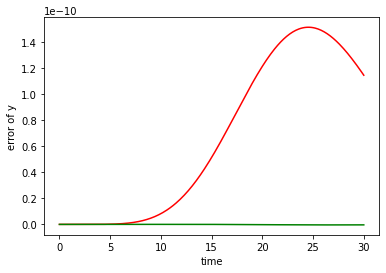

In [93]:
plt.xlabel('time')
plt.ylabel('error of y')
# plt.plot(test_t, test_y, c='red')
#plt.plot(solution_euler[0],solution_euler[1] - test_y, 'blue')
plt.plot(solution_rk4[0],solution_rk4[1] - test_y, 'red')
plt.plot(solution_rk45[0],solution_rk45[1] - test_y, 'green')